In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas_profiling
import itertools

In [3]:
df=pd.read_csv('E:\\task\\telco-customer-churn.csv')

# Предварительный анализ данных

Воспользуемся pandas_profiling для анализа нашего датасета

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,20468
Total Missing (%),0.0%
Total size in memory,4.5 MiB
Average record size in memory,232.0 B
Numeric,17
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,2


По полученным результатам выше видим что имеются два столбца 'noadditionallines' и 'year' которые мы можем исключить в качестве признаков для модели, т.к. они принимают одни и те же значения.

Также находим что имеется корреляция между 'totalcallduration' и 'avgcallduration', попробуем оставить только 'avgcallduration'. Аналогично из выборки уберем 'collingnum', т.к. коррелирует с costomerid.

## Рассмотрим зависимости признаков от целевой переменной churn по отдельности
### в целом из всех клиентов отток составляет около 9%

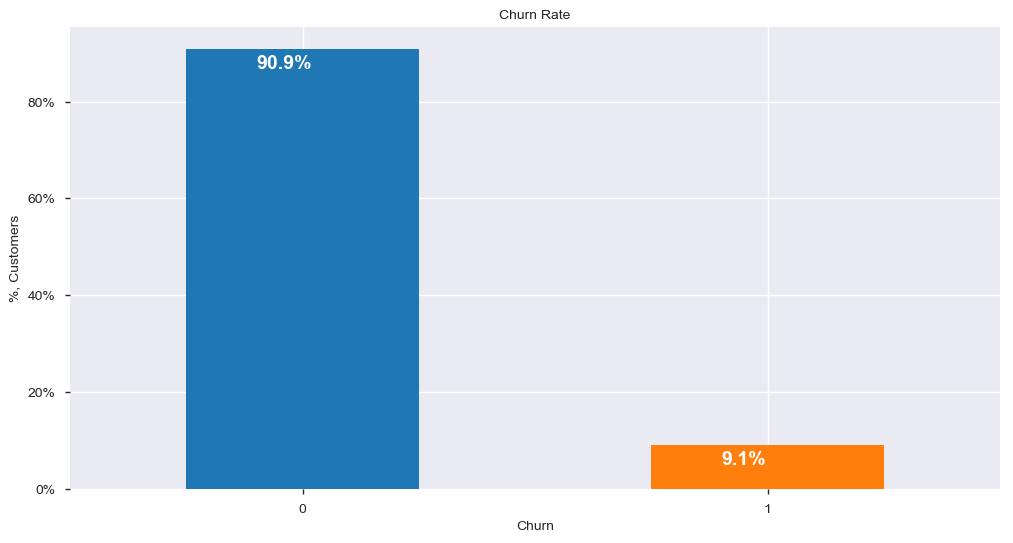

In [5]:
ax=(df['churn'].value_counts()*100.0/len(df)).plot(kind='bar',stacked=True,rot=0,figsize=(12,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('%, Customers', size=10)
ax.set_xlabel('Churn',size=10)
ax.set_title('Churn Rate',size=10)

totals=[]

for i in ax.patches:
    totals.append(i.get_width())

total=sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0,\
            str(round((i.get_height()/total),1))+'%',fontsize=12,color='white',weight='bold',size=14)

### По половому признаку отток у женщин по сравнению с мужчинами незначительно больше

C:\Users\shaim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'')

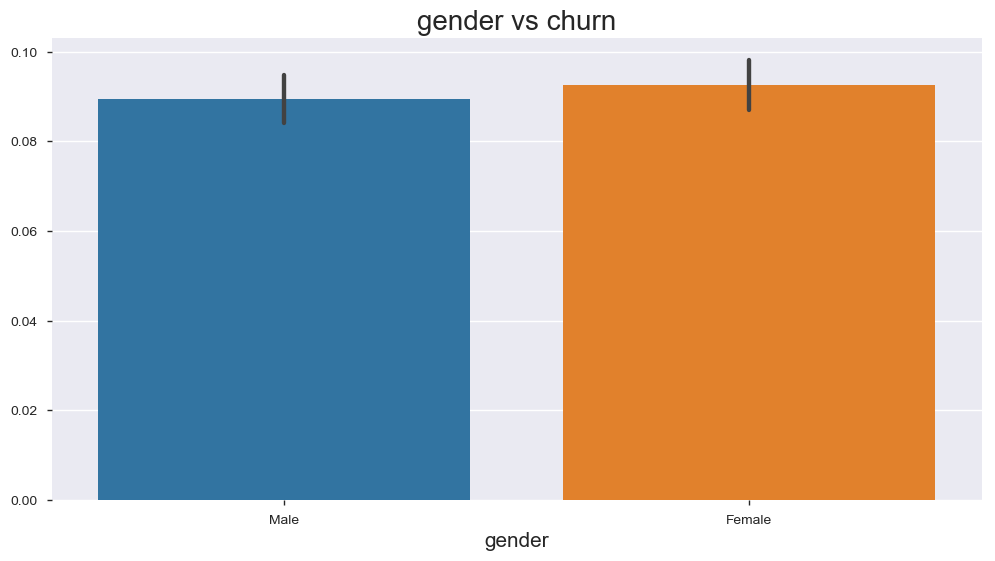

In [6]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='gender',y='churn',data=df)
ax.set_title('gender vs churn',fontsize=20)
ax.set_xlabel('gender',fontsize=15)
ax.set_ylabel('',fontsize=15)

### Оттоки по уровню образования представлены ниже

C:\Users\shaim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'')

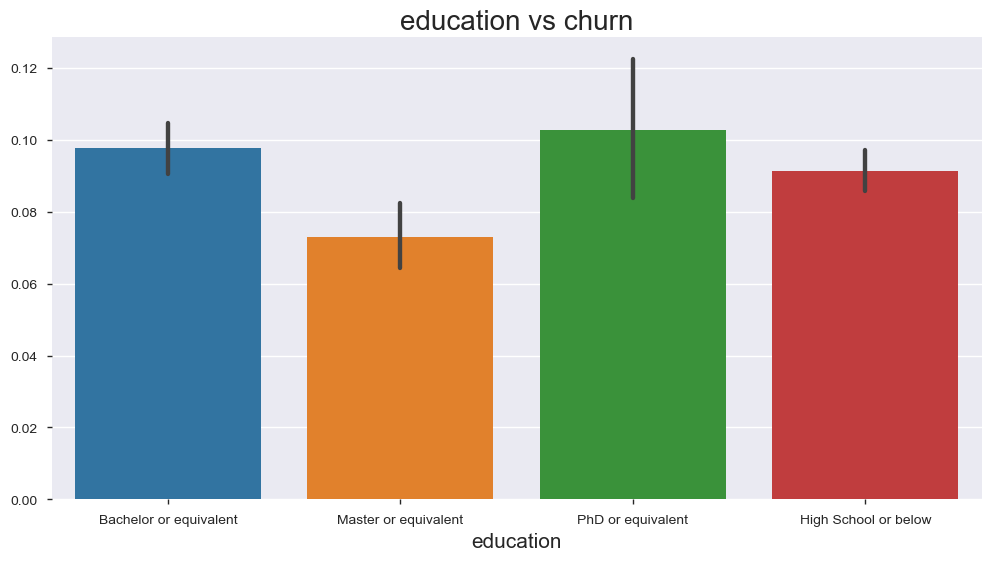

In [6]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='education',y='churn',data=df)
ax.set_title('education vs churn',fontsize=20)
ax.set_xlabel('education',fontsize=15)
ax.set_ylabel('',fontsize=15)

C:\Users\shaim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'')

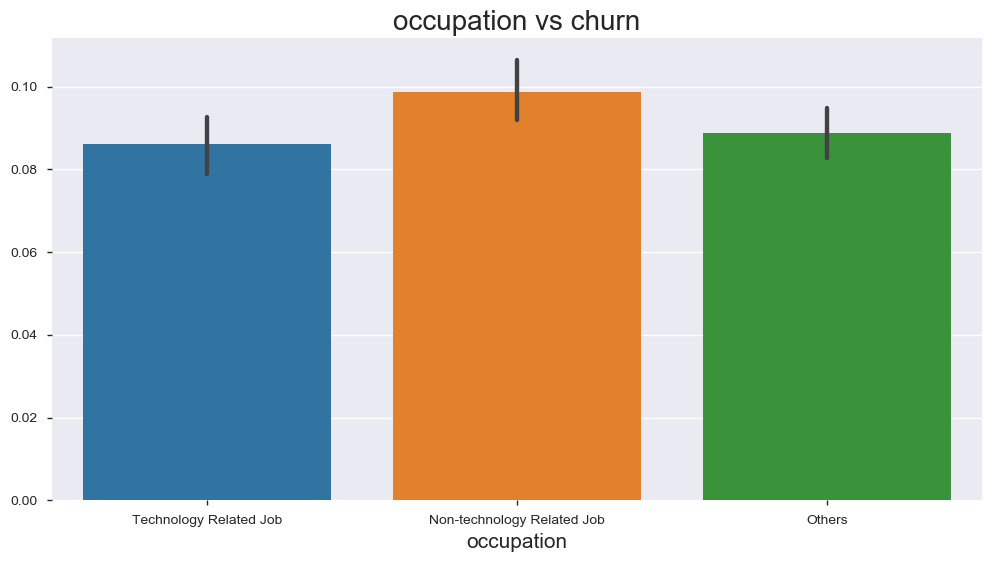

In [7]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='occupation',y='churn',data=df)
ax.set_title('occupation vs churn',fontsize=20)
ax.set_xlabel('occupation',fontsize=15)
ax.set_ylabel('',fontsize=15)

### Согласно оттоку в разрезе штатов, можно заметить что клиенты с SC,CA подвержены риску оттока нежели клиенты со штатов VT,NE,AL и т.д.

C:\Users\shaim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'')

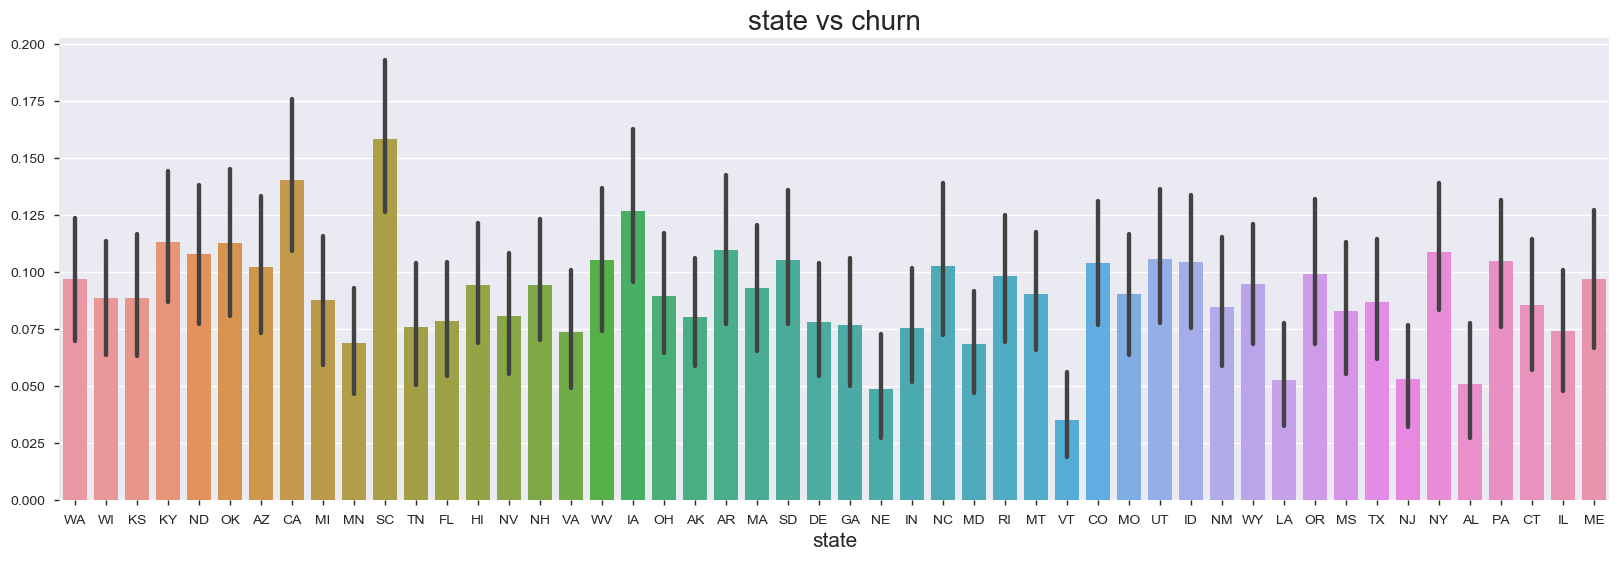

In [8]:
plt.figure(figsize=(20,6))
ax=sns.barplot(x='state',y='churn',data=df)
ax.set_title('state vs churn',fontsize=20)
ax.set_xlabel('state',fontsize=15)
ax.set_ylabel('',fontsize=15)

### Молодые клиенты чаще готовы покинуть своего оператора

Text(0,0.5,'age')

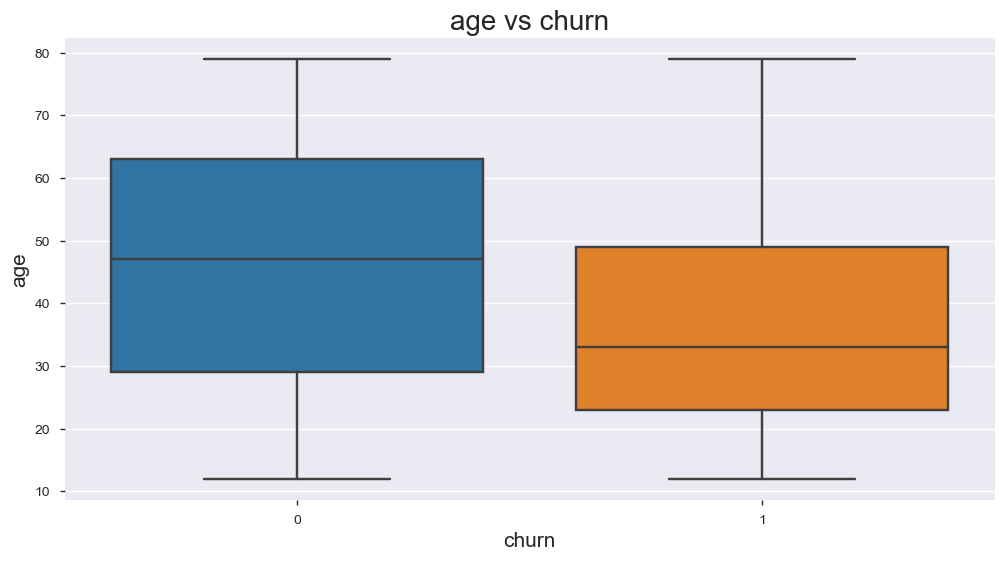

In [9]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='churn',y='age',data=df)
ax.set_title('age vs churn',fontsize=20)
ax.set_xlabel('churn',fontsize=15)
ax.set_ylabel('age',fontsize=15)

Text(0,0.5,'calldroprate')

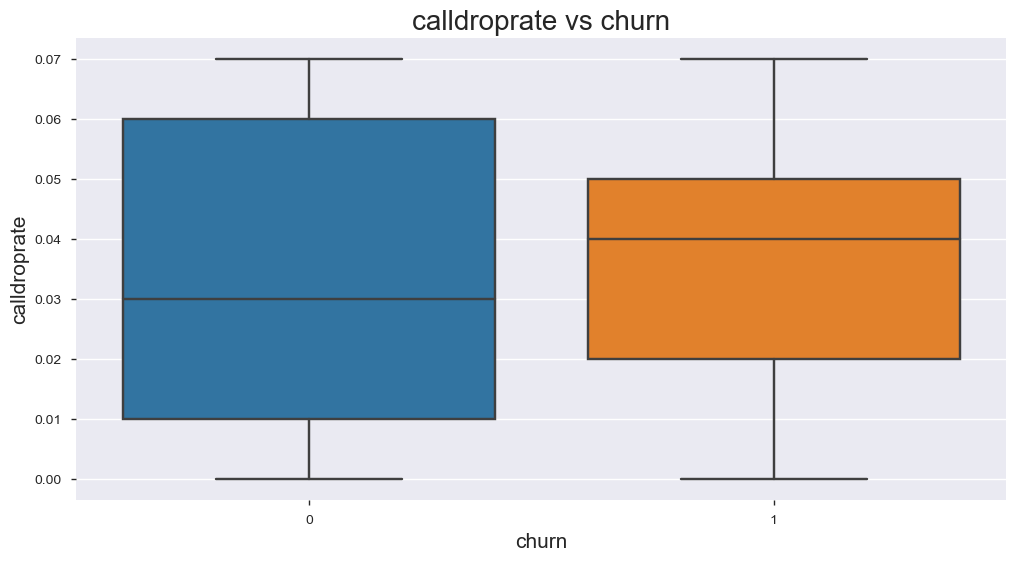

In [10]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='churn',y='calldroprate',data=df)
ax.set_title('calldroprate vs churn',fontsize=20)
ax.set_xlabel('churn',fontsize=15)
ax.set_ylabel('calldroprate',fontsize=15)

### Также очевидно что клиенты которые имееют много жалоб, также готовы сменить своего сотового оператора

Text(0,0.5,'numberofcomplaints')

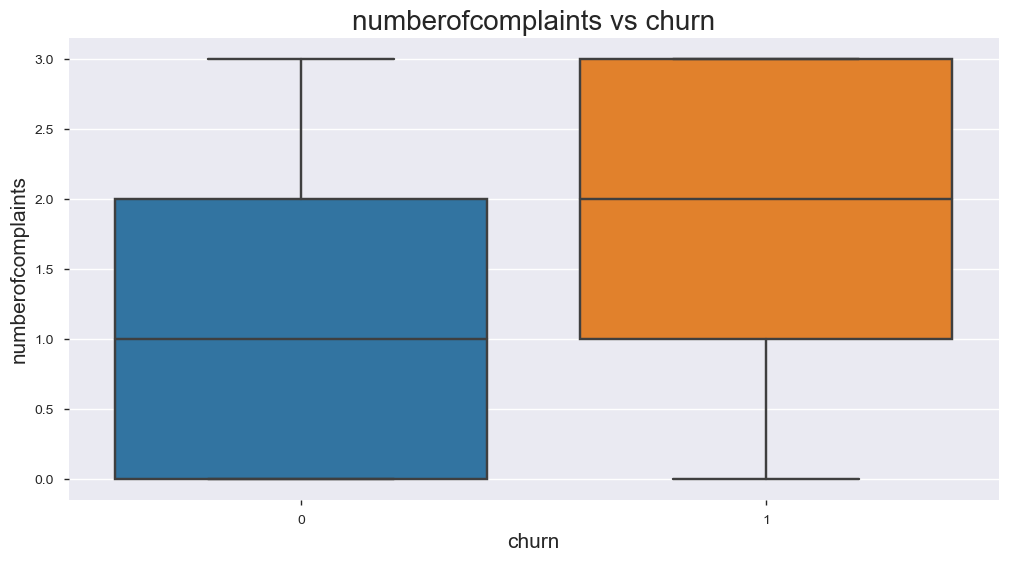

In [11]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='churn',y='numberofcomplaints',data=df)
ax.set_title('numberofcomplaints vs churn',fontsize=20)
ax.set_xlabel('churn',fontsize=15)
ax.set_ylabel('numberofcomplaints',fontsize=15)

### Если клиент не оплачивает больше 5 месяца то скорее всего он уйдет

Text(0,0.5,'numberofmonthunpaid')

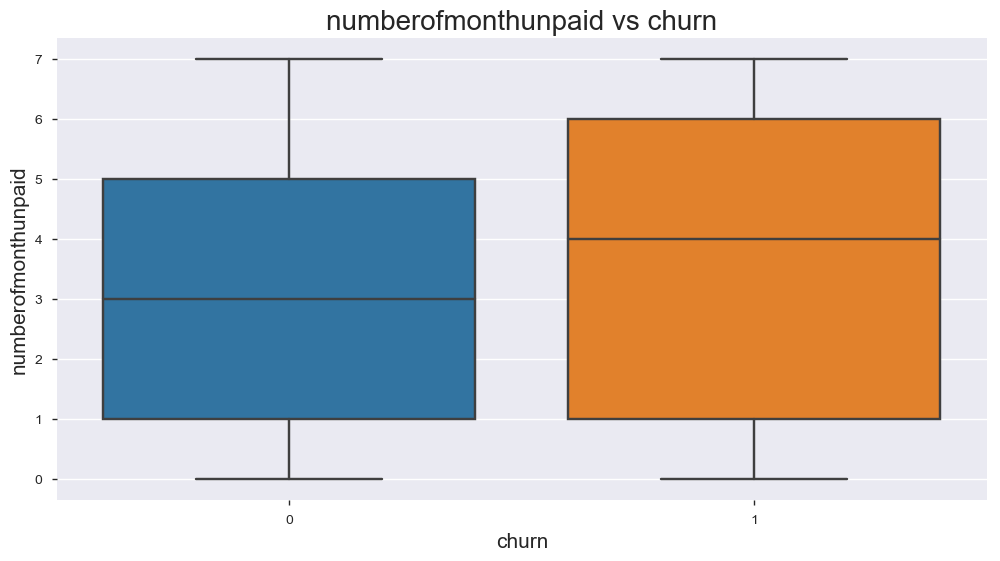

In [12]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='churn',y='numberofmonthunpaid',data=df)
ax.set_title('numberofmonthunpaid vs churn',fontsize=20)
ax.set_xlabel('churn',fontsize=15)
ax.set_ylabel('numberofmonthunpaid',fontsize=15)

### Если клиент имеет неоплаченный баланс свыше 180 y.e. то также подвержен к оттоку

Text(0,0.5,'unpaidbalance')

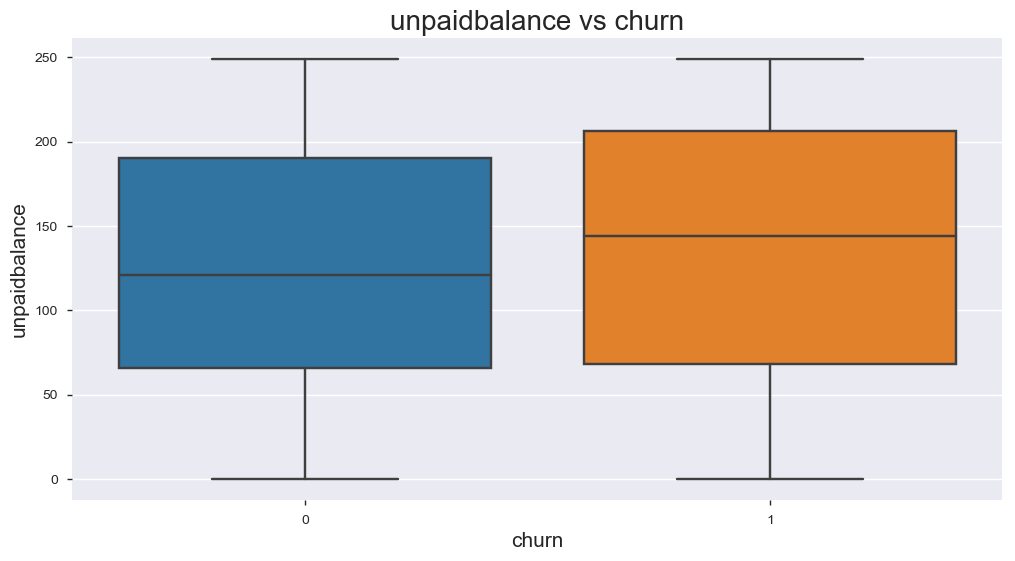

In [13]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='churn',y='unpaidbalance',data=df)
ax.set_title('unpaidbalance vs churn',fontsize=20)
ax.set_xlabel('churn',fontsize=15)
ax.set_ylabel('unpaidbalance',fontsize=15)

In [14]:
y_train1=df['churn']
df.drop(labels=['churn','noadditionallines','year','totalcallduration','callingnum'], axis=1, inplace=True)

In [15]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,StandardScaler,  Imputer, LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

In [16]:
#Создадим класс для LabelEncoder чтобы в дальнейшем его использовать в pipeline
class LabelEncoderPipelineFriendly(LabelEncoder):
    
    def fit(self, X, y=None):
        super(LabelEncoderPipelineFriendly, self).fit(X)
        
    def transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).fit(X).transform(X).reshape(-1, 1)

In [17]:
#Выделим столбцы с числовыми значениями
def get_numeric_col(df):
    return df[['age','annualincome','calldroprate','callfailurerate','customerid','monthlybilledamount','numberofcomplaints','numberofmonthunpaid','numdayscontractequipmentplanexpiring','penaltytoswitch','totalminsusedinlastmonth','unpaidbalance','percentagecalloutsidenetwork','avgcallduration','month']]
#Выделим столбцы boolean
def get_boolean_customersuspended(df):
    return df[['customersuspended']]
def get_boolean_gender(df):
    return df[['gender']]
def get_boolean_homeowner(df):
    return df[['homeowner']]
def get_boolean_maritalstatus(df):
    return df[['maritalstatus']]
def get_boolean_usesinternetservice(df):
    return df[['usesinternetservice']]
def get_boolean_usesvoiceservice(df):
    return df[['usesvoiceservice']]
#Выделим столбцы categorical
def get_categ_education(df):
    return df[['education']]
def get_categ_occupation(df):
    return df[['occupation']]
def get_categ_state(df):
    return df[['state']]

Воспользуемся pipeline (все числовые столбцы отмасштабируем через StandardScaler, столбцы с бинарными значенимя покажем как 0 и 1 (LabelEncoder), а остальные столбцы с категорияльными признаками применим OneHotEncoder, предварительно применив LabelEncoder.
Далее все объединим через make_union

##### После этого все наши признаки будут иметь числовые значения

In [18]:
vec = make_union(*[
  make_pipeline(FunctionTransformer(get_numeric_col, validate=False),StandardScaler()),
        
  make_pipeline(FunctionTransformer(get_boolean_customersuspended, validate=False),  LabelEncoderPipelineFriendly()),
  make_pipeline(FunctionTransformer(get_boolean_gender, validate=False),  LabelEncoderPipelineFriendly()),
  make_pipeline(FunctionTransformer(get_boolean_homeowner, validate=False),  LabelEncoderPipelineFriendly()),
  make_pipeline(FunctionTransformer(get_boolean_maritalstatus, validate=False),  LabelEncoderPipelineFriendly()),
  make_pipeline(FunctionTransformer(get_boolean_usesinternetservice, validate=False),  LabelEncoderPipelineFriendly()),
  make_pipeline(FunctionTransformer(get_boolean_usesvoiceservice, validate=False),  LabelEncoderPipelineFriendly()),
     
  make_pipeline(FunctionTransformer(get_categ_education, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_categ_occupation, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
  make_pipeline(FunctionTransformer(get_categ_state, validate=False),  LabelEncoderPipelineFriendly(),OneHotEncoder(sparse=False)),
])

Применяем преобразование непосредственно к нашему датасету (признаков стало больше за счет кодировки OneHotEncoder)

In [19]:
x_train1=vec.fit_transform(df)
x_train1.shape

C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

(20468, 78)

In [20]:
#разобьем нашу выборку на test и train, на выборке train будем обучать модель, в том числе и подбирать параметры, а качество модели узнаем на test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train1, y_train1, test_size=0.1, random_state=42)

# ОБУЧЕНИЕ МОДЕЛИ

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union, make_pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,  Imputer, LabelBinarizer, OneHotEncoder,StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from xgboost import XGBClassifier
scorer='roc_auc'
n_fold=10
cv_strategy = StratifiedShuffleSplit(n_splits=n_fold,test_size=0.3, random_state=3)

## Случайный лес

In [34]:
# через GridSearvCV подберем параметры так чтобы он имел наибольший score
model=RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None, 3, 5, 15]
                 }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.955593495126318
Best parameters: {'max_depth': None, 'n_estimators': 1000}


             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1850
          1       1.00      0.77      0.87       197

avg / total       0.98      0.98      0.98      2047

accuracy: 0.978
CV mean score(roc_auc): 0.9716 std: +/-0.0043
roc_auc on test: 0.9956
avg precision score: 0.7936


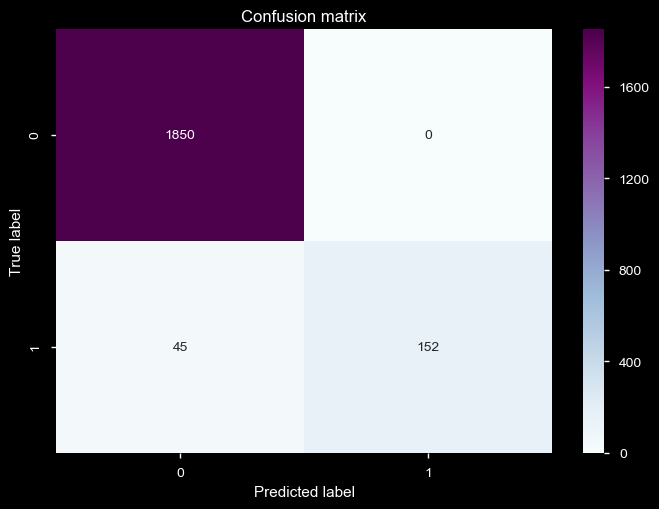

In [36]:
#выбираем модель с лучшими параметрами
model_rfc=RandomForestClassifier(**grid_search.best_params_)
#тренируем выбранную модель на тренировочной выборке
model_rfc.fit(x_train, y_train)
#получаем предсказания для тестовой выборки
log_predic=model_rfc.predict(x_test)
#получаем вероятностные предсказания для тестовой выборки
log_predic_proba=model_rfc.predict_proba(x_test)
#считаем метрику accuracy на тествой выборке
ac_sc=metrics.accuracy_score(y_test,log_predic)

#рисуем через библиотеку seaborn confussion matrix
r = sns.heatmap(metrics.confusion_matrix(y_test,log_predic), cmap='BuPu', annot=True,fmt="d")
r.set_title("Confusion matrix")
r.set_xlabel("Predicted label")
r.set_ylabel("True label")

#выводим на печать accuracy
print(metrics.classification_report(y_test,log_predic))
print('accuracy: {}' .format(round(ac_sc,4)))

#посчитаем через кросс-валидацию на всей выборке среднее значение метрики roc_auc, при этом шафлить будем через StratifiedShuffleSplit на 10 фолдах
mean1=cross_val_score(model_rfc,x_train1,y_train1,scoring=scorer,cv=cv_strategy).mean()
std1=cross_val_score(model_rfc,x_train1,y_train1,scoring=scorer,cv=cv_strategy).std()
print('CV mean score(roc_auc): {}' .format(round(mean1,4)),'std: +/-{}' .format(round(std1,5)))

#считаем и выводим на печать roc_auc на тествой выборке
roc_auc_test=metrics.roc_auc_score(y_test,log_predic_proba[:,1])
print('roc_auc on test: {}' .format(round(roc_auc_test,4)))

#считаем и выводим на печать средний precision score на тествой выборке
avg_prec=metrics.average_precision_score(y_test,log_predic)
print('avg precision score: {}' .format(round(avg_prec,4)))

## Дерево Решении

In [38]:
model=DecisionTreeClassifier()

parameter_grid = {
                  'max_depth': [None, 1, 2, 3]
                 }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8197536701810224
Best parameters: {'max_depth': None}


             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1850
          1       0.93      0.90      0.92       197

avg / total       0.98      0.98      0.98      2047

accuracy: 0.9844
CV mean score(roc_auc): 0.8609 std: +/-0.01069
roc_auc on test: 0.9483
avg precision score: 0.8513


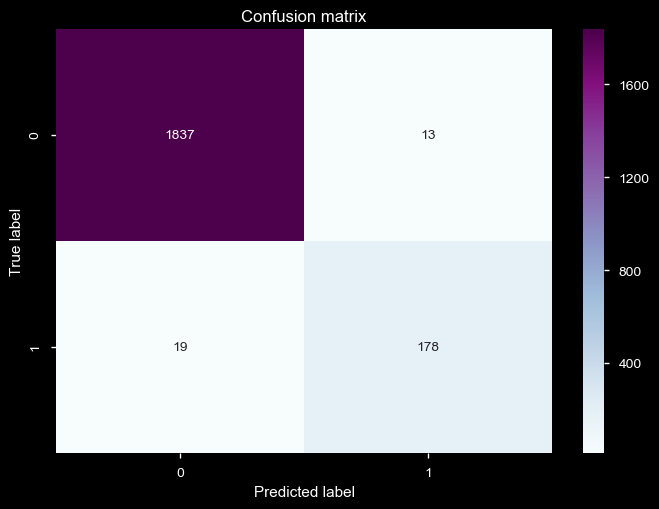

In [39]:
model_dtc=DecisionTreeClassifier(**grid_search.best_params_)
model_dtc.fit(x_train, y_train)
log_predic=model_dtc.predict(x_test)
log_predic_proba=model_dtc.predict_proba(x_test)
ac_sc=metrics.accuracy_score(y_test,log_predic)

r = sns.heatmap(metrics.confusion_matrix(y_test,log_predic), cmap='BuPu', annot=True,fmt="d")
r.set_title("Confusion matrix")
r.set_xlabel("Predicted label")
r.set_ylabel("True label")

ac_sc=metrics.accuracy_score(y_test,log_predic)
print(metrics.classification_report(y_test,log_predic))
print('accuracy: {}' .format(round(ac_sc,4)))

mean1=cross_val_score(model_dtc,x_train1,y_train1,scoring=scorer,cv=cv_strategy).mean()
std1=cross_val_score(model_dtc,x_train1,y_train1,scoring=scorer,cv=cv_strategy).std()
print('CV mean score(roc_auc): {}' .format(round(mean1,4)),'std: +/-{}' .format(round(std1,5)))


roc_auc_test=metrics.roc_auc_score(y_test,log_predic_proba[:,1])
print('roc_auc on test: {}' .format(round(roc_auc_test,4)))

avg_prec=metrics.average_precision_score(y_test,log_predic)
print('avg precision score: {}' .format(round(avg_prec,4)))

Имеет место переобучению, т.к. деревья решении запоминают выборку (высокий accuracy)

## Логистическая регрессия

In [32]:
model=LogisticRegression()

parameter_grid = {'penalty' : ['l1','l2'],
                  'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                  'solver': ['liblinear'],
                  'class_weight' : ['balanced', None],
                }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6666830714143624
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


             precision    recall  f1-score   support

          0       0.93      0.60      0.73      1850
          1       0.13      0.56      0.21       197

avg / total       0.85      0.60      0.68      2047

accuracy: 0.6009
CV mean score(roc_auc): 0.6635 std: +/-0.00972
roc_auc on test: 0.6454
avg precision score: 0.1163


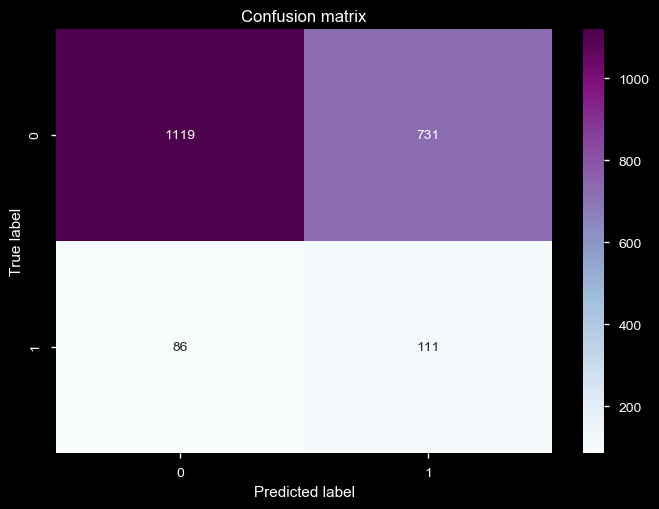

In [33]:
model_log=LogisticRegression(**grid_search.best_params_)
model_log.fit(x_train, y_train)
log_predic=model_log.predict(x_test)
log_predic_proba=model_log.predict_proba(x_test)
ac_sc=metrics.accuracy_score(y_test,log_predic)

r = sns.heatmap(metrics.confusion_matrix(y_test,log_predic), cmap='BuPu', annot=True,fmt="d")
r.set_title("Confusion matrix")
r.set_xlabel("Predicted label")
r.set_ylabel("True label")

ac_sc=metrics.accuracy_score(y_test,log_predic)
print(metrics.classification_report(y_test,log_predic))
print('accuracy: {}' .format(round(ac_sc,4)))

mean1=cross_val_score(model_log,x_train1,y_train1,scoring=scorer,cv=cv_strategy).mean()
std1=cross_val_score(model_log,x_train1,y_train1,scoring=scorer,cv=cv_strategy).std()
print('CV mean score(roc_auc): {}' .format(round(mean1,4)),'std: +/-{}' .format(round(std1,5)))


roc_auc_test=metrics.roc_auc_score(y_test,log_predic_proba[:,1])
print('roc_auc on test: {}' .format(round(roc_auc_test,4)))

avg_prec=metrics.average_precision_score(y_test,log_predic)
print('avg precision score: {}' .format(round(avg_prec,4)))

## AdaBoostClassifier

In [40]:
model=AdaBoostClassifier()

parameter_grid = {'n_estimators': [5, 10, 20, 50, 100],
                  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
                 }


grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7187213845235727
Best parameters: {'learning_rate': 1.0, 'n_estimators': 100}


             precision    recall  f1-score   support

          0       0.90      1.00      0.95      1850
          1       0.18      0.01      0.02       197

avg / total       0.83      0.90      0.86      2047

accuracy: 0.9003
CV mean score(roc_auc): 0.7234 std: +/-0.00553
roc_auc on test: 0.7324
avg precision score: 0.0971


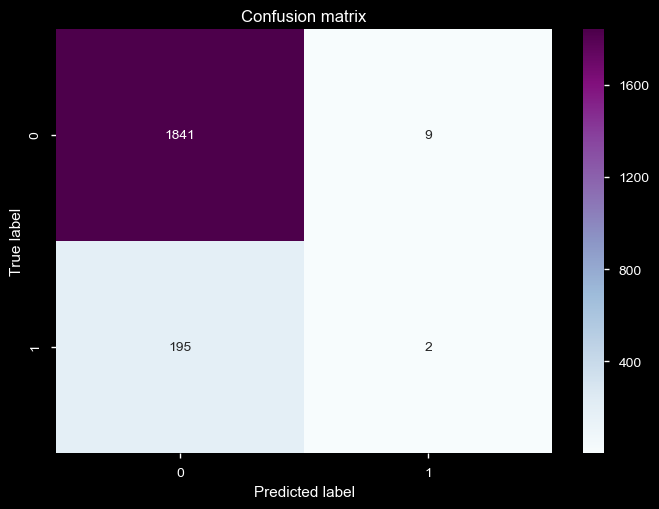

In [41]:
model_abc=AdaBoostClassifier(**grid_search.best_params_)
model_abc.fit(x_train, y_train)
log_predic=model_abc.predict(x_test)
log_predic_proba=model_abc.predict_proba(x_test)
ac_sc=metrics.accuracy_score(y_test,log_predic)

r = sns.heatmap(metrics.confusion_matrix(y_test,log_predic), cmap='BuPu', annot=True,fmt="d")
r.set_title("Confusion matrix")
r.set_xlabel("Predicted label")
r.set_ylabel("True label")

ac_sc=metrics.accuracy_score(y_test,log_predic)
print(metrics.classification_report(y_test,log_predic))
print('accuracy: {}' .format(round(ac_sc,4)))

mean1=cross_val_score(model_abc,x_train1,y_train1,scoring=scorer,cv=cv_strategy).mean()
std1=cross_val_score(model_abc,x_train1,y_train1,scoring=scorer,cv=cv_strategy).std()
print('CV mean score(roc_auc): {}' .format(round(mean1,4)),'std: +/-{}' .format(round(std1,5)))


roc_auc_test=metrics.roc_auc_score(y_test,log_predic_proba[:,1])
print('roc_auc on test: {}' .format(round(roc_auc_test,4)))

avg_prec=metrics.average_precision_score(y_test,log_predic)
print('avg precision score: {}' .format(round(avg_prec,4)))

Также алгоритм не подходит, не находит класс оттока

## Стохастический градиентный спуск

In [44]:
model=SGDClassifier(eta0=1, max_iter=1000, tol=0.0001)

parameter_grid = {'loss': ['log', 'modified_huber'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'alpha': [0.001, 0.01],
                  'l1_ratio': [0, 0.15, 0.5, 1.0],
                  'learning_rate': ['optimal', 'invscaling']
                 }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6649984881639148
Best parameters: {'alpha': 0.001, 'l1_ratio': 1.0, 'learning_rate': 'invscaling', 'loss': 'log', 'penalty': 'l2'}


C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.90      1.00      0.95      1850
          1       0.00      0.00      0.00       197

avg / total       0.82      0.90      0.86      2047

accuracy: 0.9038
CV mean score(roc_auc): 0.6572 std: +/-0.01019
roc_auc on test: 0.637
avg precision score: 0.0962


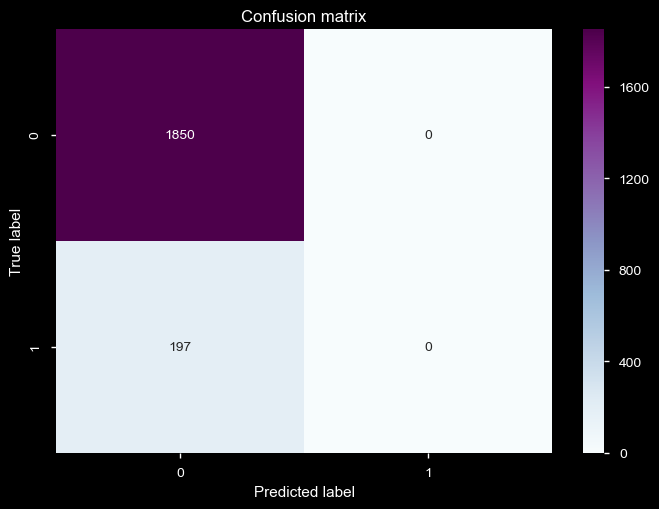

In [46]:
model_sgd=SGDClassifier(**grid_search.best_params_,eta0=1, max_iter=1000, tol=0.0001)
model_sgd.fit(x_train, y_train)
log_predic=model_sgd.predict(x_test)
log_predic_proba=model_sgd.predict_proba(x_test)
ac_sc=metrics.accuracy_score(y_test,log_predic)

r = sns.heatmap(metrics.confusion_matrix(y_test,log_predic), cmap='BuPu', annot=True,fmt="d")
r.set_title("Confusion matrix")
r.set_xlabel("Predicted label")
r.set_ylabel("True label")

ac_sc=metrics.accuracy_score(y_test,log_predic)
print(metrics.classification_report(y_test,log_predic))
print('accuracy: {}' .format(round(ac_sc,4)))

mean1=cross_val_score(model_sgd,x_train1,y_train1,scoring=scorer,cv=cv_strategy).mean()
std1=cross_val_score(model_sgd,x_train1,y_train1,scoring=scorer,cv=cv_strategy).std()
print('CV mean score(roc_auc): {}' .format(round(mean1,4)),'std: +/-{}' .format(round(std1,5)))


roc_auc_test=metrics.roc_auc_score(y_test,log_predic_proba[:,1])
print('roc_auc on test: {}' .format(round(roc_auc_test,4)))

avg_prec=metrics.average_precision_score(y_test,log_predic)
print('avg precision score: {}' .format(round(avg_prec,4)))

Не подходит, алгоритм не находит True Negativ

## XGBoost

C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1850
          1       0.99      0.90      0.95       197

avg / total       0.99      0.99      0.99      2047

accuracy: 0.9902
CV mean score(roc_auc): 0.9304 std: +/-0.00563
roc_auc on test: 0.9756
avg precision score: 0.9078


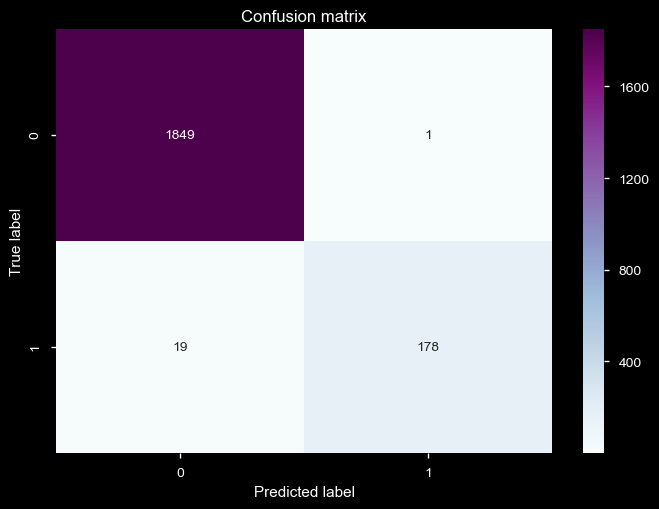

In [47]:
model_xgb=XGBClassifier(base_score=0.5, booster='gbtree',max_depth = 7,learning_rate=0.9)
model_xgb.fit(x_train, y_train)
log_predic=model_xgb.predict(x_test)
log_predic_proba=model_xgb.predict_proba(x_test)
ac_sc=metrics.accuracy_score(y_test,log_predic)

r = sns.heatmap(metrics.confusion_matrix(y_test,log_predic), cmap='BuPu', annot=True,fmt="d")
r.set_title("Confusion matrix")
r.set_xlabel("Predicted label")
r.set_ylabel("True label")

ac_sc=metrics.accuracy_score(y_test,log_predic)
print(metrics.classification_report(y_test,log_predic))
print('accuracy: {}' .format(round(ac_sc,4)))

mean1=cross_val_score(model_xgb,x_train1,y_train1,scoring=scorer,cv=cv_strategy).mean()
std1=cross_val_score(model_xgb,x_train1,y_train1,scoring=scorer,cv=cv_strategy).std()
print('CV mean score(roc_auc): {}' .format(round(mean1,4)),'std: +/-{}' .format(round(std1,5)))


roc_auc_test=metrics.roc_auc_score(y_test,log_predic_proba[:,1])
print('roc_auc on test: {}' .format(round(roc_auc_test,4)))

avg_prec=metrics.average_precision_score(y_test,log_predic)
print('avg precision score: {}' .format(round(avg_prec,4)))

Из-за мощности алгоритма, имеет место быть переобучению. Но стоит отметить среднее на CV и avg pr высокие

С помощью готовых вычислении в roc_curve() и precision_recall_curve() построим кривые ROC-AUC и PR-AUC

## Построим кривые ROC-AUC

C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


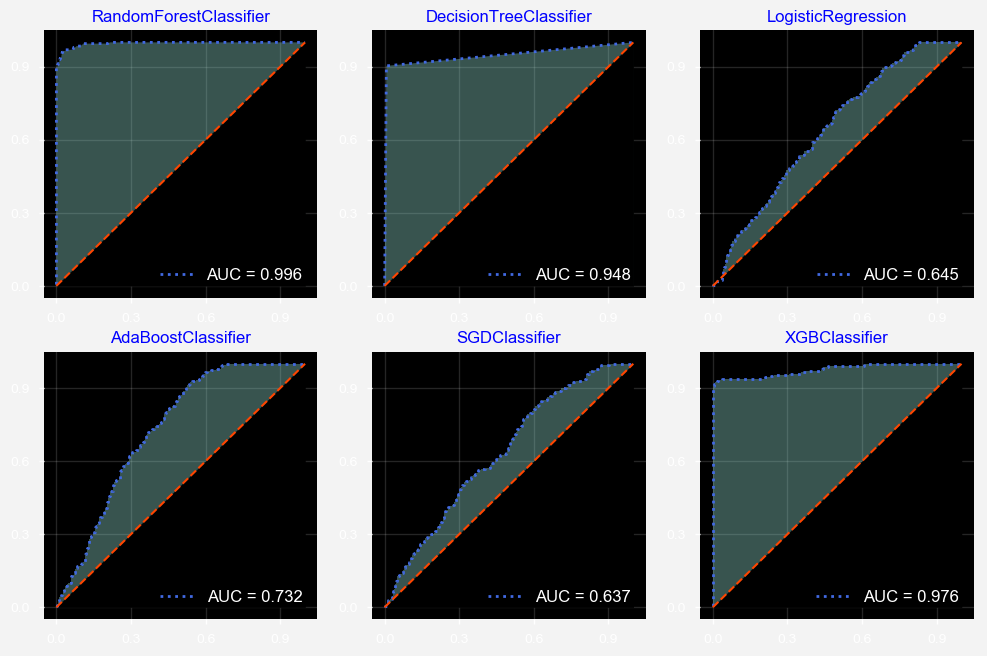

In [48]:
lst=[model_rfc,model_dtc,model_log,model_abc,model_sgd,model_xgb]
length=len(lst)
mods=['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','AdaBoostClassifier','SGDClassifier','XGBClassifier']
plt.style.use("dark_background")
fig=plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(x_test)
    predictions   = i.predict(x_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(metrics.roc_auc_score(y_test,probabilities[:,1]),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## Построим кривые PR-AUC

C:\Users\shaim\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


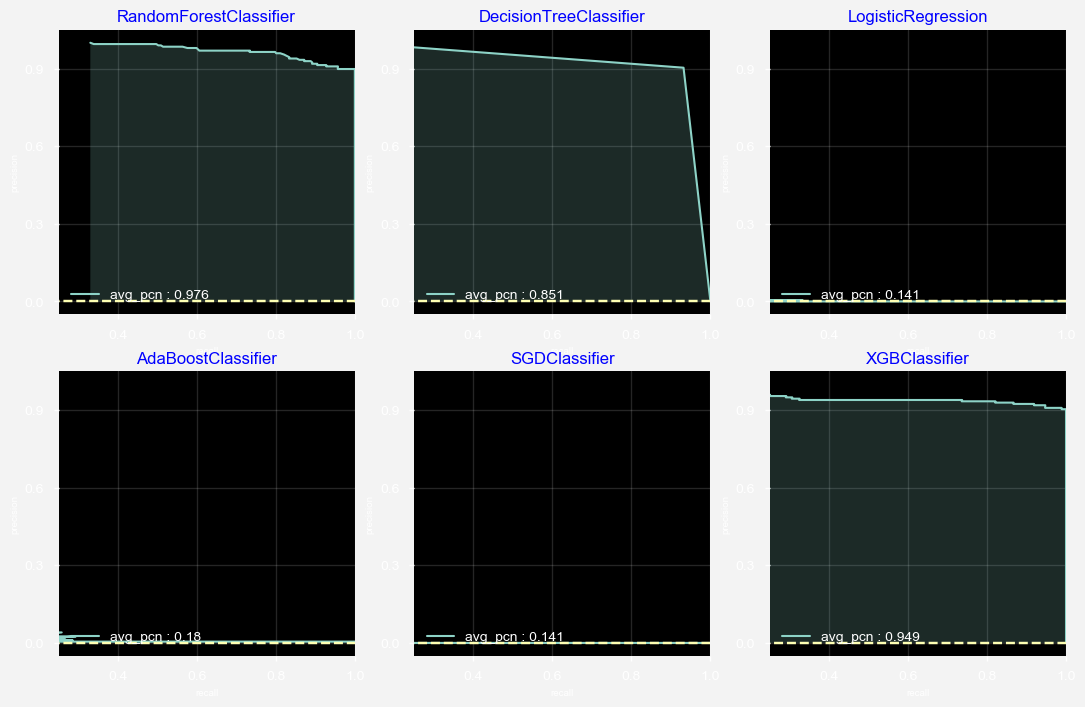

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst=[model_rfc,model_dtc,model_log,model_abc,model_sgd,model_xgb]
length=len(lst)
mods=['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','AdaBoostClassifier','SGDClassifier','XGBClassifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(x_test)
    predictions   = i.predict(x_test)
    recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,probabilities[:,1]),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

Теперь покажем какие признаки наиболее важны
В качестве модели возьмем RandomForestClassifier и посмотрим при каких признаков коэффициенты наиболее значимые, предварительно необходимо убрать категориальные признаки

In [70]:
drop=['customersuspended','gender','homeowner','maritalstatus','maritalstatus','usesinternetservice','usesvoiceservice','education','occupation','state']
x=df.drop(drop,axis=1)
y=y_train1
model_rfc1 = model_rfc.fit(x, y)

In [74]:
imp = pd.Series(data=model_rfc.feature_importances_, index=df.drop(drop,axis=1).columns).sort_values(ascending=False)

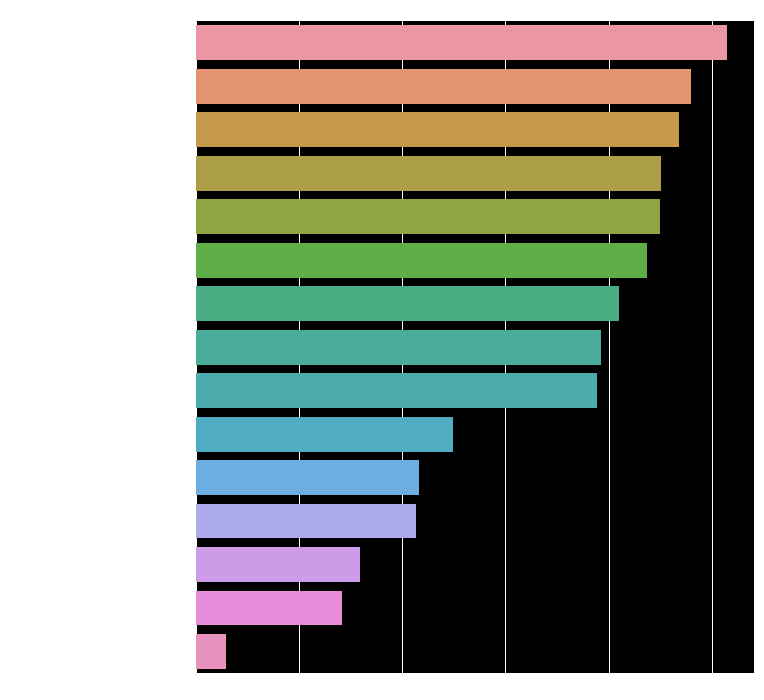

In [100]:
plt.figure(figsize=(10,12),edgecolor='b')
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values)
